In [7]:
import numpy as np
import pandas as pd
data_dir = "../LlenguaCatalana/dades_david/"


dat1 = pd.read_csv(data_dir + "cat2011.csv", delimiter=";")
dat2 = pd.read_csv(data_dir + "cat2001.csv", delimiter=";")
dat3 = pd.read_csv(data_dir + "est2011.csv", delimiter=";",encoding="latin1")
dat4 = pd.read_csv(data_dir + "est2001.csv", delimiter=";",encoding="latin1")

# show loaded table:
#dat4

In [8]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
data_dir = "../LlenguaCatalana/dades_david/"
comarques = gpd.read_file(data_dir + "comarq.geojson")

In [10]:
print(comarques.columns)

Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


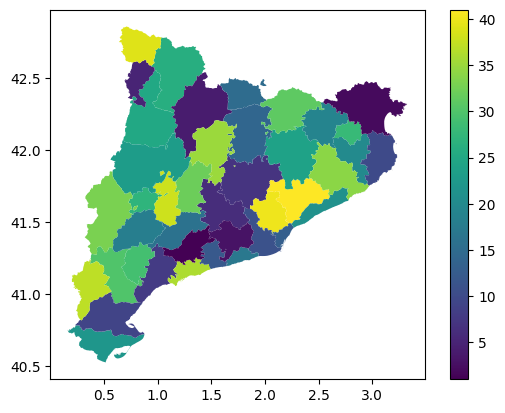

In [11]:
comarques.plot(column='comarca',
 #              cmap='OrRd',
    legend=True,
#    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"},
);

In [12]:
print(dat1.columns)
print(comarques.columns)

Index(['Unnamed: 0', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [13]:
dat1.rename(columns={'Unnamed: 0': 'nom_comar'}, inplace=True)

In [14]:
print(dat1.columns)
print(comarques.columns)

Index(['nom_comar', 'L'entén', 'El sap parlar', 'El sap llegir',
       'El sap escriure', 'No l'entén', 'Població de 2 anys i més',
       'Unnamed: 7', '% sap parlar', '% int'],
      dtype='object')
Index(['cartodb_id', 'comarca', 'provincia', 'nom_comar', 'sup_comar',
       'geometry'],
      dtype='object')


In [15]:
merged = comarques.merge(dat1, on="nom_comar")

In [16]:
merged

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,L'entén,El sap parlar,El sap llegir,El sap escriure,No l'entén,Població de 2 anys i més,Unnamed: 7,% sap parlar,% int
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.4942 41.19...",21852,19060,18807,13229,974,22826,NaN,"83,50127048",83
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.2355 40.78...",67547,54647,56357,36302,1773,69320,NaN,"78,83294864",78
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.4849, 0.92162 42.48...",12680,11028,11052,8246,403,13083,NaN,"84,29259344",84
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96104 42.6...",7056,6255,6283,4699,79,7134,NaN,"87,67872161",87
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",35088,29963,30552,23031,1067,36156,NaN,"82,87144596",82
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",111147,90395,94676,69379,4316,115462,NaN,"78,28982696",78
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",173062,146726,151829,114435,5949,179012,NaN,"81,96433759",81
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",20245,17547,18286,13328,360,20605,NaN,"85,158942",85
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.8262 42.60515, 0.82805 42.60...",3997,3248,3377,2418,..,4032,NaN,"80,55555556",80
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",176508,139197,147335,108874,9623,186131,NaN,"74,78442602",74


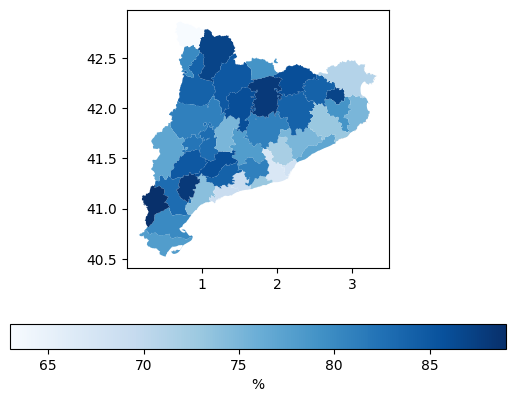

In [18]:
merged.plot(column='% int',
    cmap="Blues",
    legend=True,
    legend_kwds={"label": "%", "orientation": "horizontal"},
);

In [19]:
print(dat1)

              nom_comar  L'entén  El sap parlar  El sap llegir  \
0              Alt Camp    42677          36667          37514   
1           Alt Empordà   127128          97018         103691   
2           Alt Penedès    98905          83190          85661   
3            Alt Urgell    20245          17547          18286   
4        Alta Ribagorça     3997           3248           3377   
5                 Anoia   111147          90395          94676   
6                 Bages   173062         146726         151829   
7             Baix Camp   176508         139197         147335   
8             Baix Ebre    77044          64438          64923   
9          Baix Empordà   121682          97255         101989   
10       Baix Llobregat   730102         526488         583523   
11         Baix Penedès    91734          68163          74789   
12           Barcelonès  2058268        1487946        1653636   
13             Berguedà    39162          35326          35520   
14        